In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
from torch.utils.data import DataLoader
from pytorch_dataset import HDF5ContrastDataset

In [1]:
import torch, platform
print("PyTorch:", torch.__version__)
print("Compiled for CUDA:", torch.version.cuda)
print("Is CUDA available now?:", torch.cuda.is_available())

PyTorch: 2.7.0+cu126
Compiled for CUDA: 12.6
Is CUDA available now?: False


## My data

In [ ]:
cfg_transform = {
  "fit": [
    {"PerImageMinMaxNormalize": {}}
  ],
  "eval": [
    {"PerImageMinMaxNormalize": {}}

  ]
}

In [43]:
cfg_filters = {
  "contrast__in": ["DIXON"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "W",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"train",
}

# Load the synthetic dataset
dataset_train = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_DIXON.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

In [44]:
cfg_filters = {
  "contrast__in": ["DIXON"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "W",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"val",
}

# Load the synthetic dataset
dataset_val = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_DIXON.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

In [47]:
cfg_filters = {
  "contrast__in": ["DIXON"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "W",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"test",
}

# Load the synthetic dataset
dataset_test = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_DIXON.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

In [48]:
cfg_filters = {
  "contrast__in": ["T1_mapping_fl2d"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "s",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"train",
}

# Load the synthetic dataset
dataset_T1_train = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_T1_mapping_fl2d.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

cfg_filters = {
  "contrast__in": ["T1_mapping_fl2d"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "s",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"val",
}

# Load the synthetic dataset
dataset_T1_val = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_T1_mapping_fl2d.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

cfg_filters = {
  "contrast__in": ["T1_mapping_fl2d"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "s",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"test",
}

# Load the synthetic dataset
dataset_T1_test = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_T1_mapping_fl2d.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

In [30]:
dataset[0]["image"].shape

torch.Size([1, 256, 256])

In [33]:
import numpy as np
import h5py
import torch

def save_dataset_as_mat(dataset, out_file, var='data_fs', compression='gzip'):
    """Save so that LoadDataSet() shows the image upright."""
    import numpy as np, h5py, torch

    imgs = []
    for i in range(len(dataset)):
        img = dataset[i]['image']          # (1,256,256)  channel‑first
        if isinstance(img, torch.Tensor):
            img = img.cpu().numpy()
        img = img.squeeze(0) .T            # <-- transpose here (W, H)
        imgs.append(img.astype(np.float32))

    imgs = np.stack(imgs, axis=0)          # (N,256,256)
    with h5py.File(out_file, 'w') as f:
        f.create_dataset(var, data=imgs,
                         dtype='float32', compression=compression)

    print(f'✔ Saved {len(imgs)} slices to {out_file} (will load as (N,1,256,256))')



In [49]:
save_dataset_as_mat(dataset_train,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_train_DIXON.h5")

save_dataset_as_mat(dataset_val,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_val_DIXON.h5")

save_dataset_as_mat(dataset_test,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_test_DIXON.h5")

✔ Saved 1180 slices to /home/students/studweilc1/SynDiff/my_data/data_train_DIXON.h5 (will load as (N,1,256,256))
✔ Saved 137 slices to /home/students/studweilc1/SynDiff/my_data/data_val_DIXON.h5 (will load as (N,1,256,256))
✔ Saved 149 slices to /home/students/studweilc1/SynDiff/my_data/data_test_DIXON.h5 (will load as (N,1,256,256))


In [50]:
save_dataset_as_mat(dataset_T1_train,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_train_T1.h5")

save_dataset_as_mat(dataset_T1_val,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_val_T1.h5")

save_dataset_as_mat(dataset_T1_test,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_test_T1.h5")

✔ Saved 1188 slices to /home/students/studweilc1/SynDiff/my_data/data_train_T1.h5 (will load as (N,1,256,256))
✔ Saved 135 slices to /home/students/studweilc1/SynDiff/my_data/data_val_T1.h5 (will load as (N,1,256,256))
✔ Saved 139 slices to /home/students/studweilc1/SynDiff/my_data/data_test_T1.h5 (will load as (N,1,256,256))


## SynDiff Data

In [40]:
def LoadDataSet(load_dir, variable = 'data_fs', padding = True, Norm = True):
    f = h5py.File(load_dir,'r') 
    if np.array(f[variable]).ndim==3:
        data=np.expand_dims(np.transpose(np.array(f[variable]),(0,2,1)),axis=1)

    else:
        data=np.transpose(np.array(f[variable]),(1,0,3,2))
    data=data.astype(np.float32) 
    if padding:
        pad_x=int((256-data.shape[2])/2)
        pad_y=int((256-data.shape[3])/2)
        print('padding in x-y with:'+str(pad_x)+'-'+str(pad_y))
        data=np.pad(data,((0,0),(0,0),(pad_x,pad_x),(pad_y,pad_y)))   
    if Norm:    
        data=(data-0.5)/0.5      
    return data

In [15]:
path = "/home/students/studweilc1/SynDiff/SynDiff_sample_data/T1.mat"

mat = LoadDataSet(path, variable='data_fs', padding=True, Norm=False)

padding in x-y with:0-52


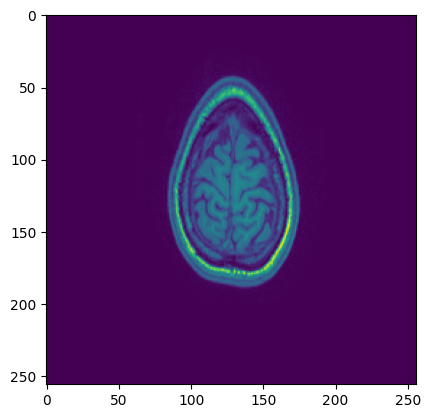

In [24]:
plt.imshow(mat[20,0,:,:])

#### Test loading

In [38]:
mat_Dixon = LoadDataSet("/home/students/studweilc1/SynDiff/SynDiff_sample_data/data_DIXON.h5", variable='data_fs', padding=True, Norm=False, Transpose=True)

padding in x-y with:0-0


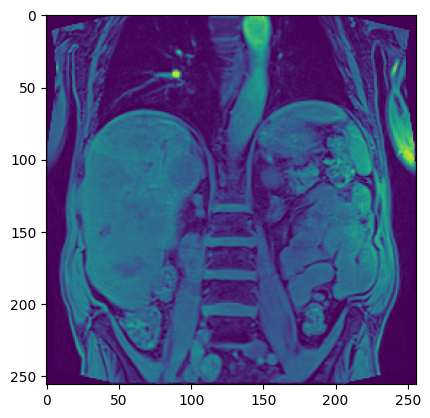

In [39]:
plt.imshow(mat_Dixon[100,0,:,:])

## Comand

In [ ]:
python3 train.py 
--image_size 256 
--exp exp_syndiff 
--num_channels 2 
--num_channels_dae 64 
--ch_mult 1 1 2 2 4 4 
--num_timesteps 4 
--num_res_blocks 2 
--batch_size 1 
--contrast1 T1 
--contrast2 T2 
--num_epoch 500 
--ngf 64 
--embedding_type positional 
--use_ema 
--ema_decay 0.999 
--r1_gamma 1. 
--z_emb_dim 256 
--lr_d 1e-4 
--lr_g 1.6e-4 
--lazy_reg 10 
--num_process_per_node 1 
--save_content 
--local_rank 0
--contrast1 DIXON
--contrast2 T1
--input_path /home/students/studweilc1/SynDiff/my_data
--output_path /home/students/studweilc1/SynDiff/my_results

SyntaxError: invalid syntax (3131903931.py, line 1)

In [ ]:
python train.py --image_size 256 --exp exp_syndiff --num_channels 2 --num_channels_dae 64 --ch_mult 1 1 2 2 4 4 --num_timesteps 4 --num_res_blocks 2 --batch_size 1 --contrast1 T1 --contrast2 T2 --num_epoch 500 --ngf 64 --embedding_type positional --use_ema --ema_decay 0.999 --r1_gamma 1. --z_emb_dim 256 --lr_d 1e-4 --lr_g 1.6e-4 --lazy_reg 10 --num_process_per_node 1 --save_content --local_rank 0 --contrast1 DIXON --contrast2 T1 --input_path /home/students/studweilc1/SynDiff/my_data --output_path /home/students/studweilc1/SynDiff/my_results